In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Import sklearn in-built dataset to play with

In [3]:
X,y=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
print(X.shape) 

(300, 2)


- X contains 300 rows and 2 columns, representing 300 sample individuals and 2 features.
- We choose 2 features because it's easy to visualize.

In [5]:
y
len(y)

300

- y is an array of length 300
- each entry is a label for corresponding individual
- y can be used to check our clustering result


### Plot scatterpoint for sample points

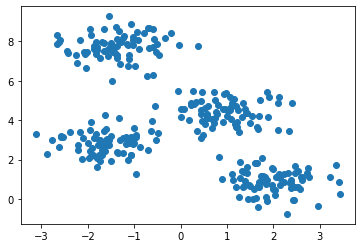

In [7]:
plt.scatter(X[:,0],X[:,1])

- As we can see, this is our plot with 300 samples in 4 clusters.
- Although the clustering result is obvious from graph, kmeans clustering still requires us to work from scratch and determine the optimal number of clusters by ourselves.(will do this by the elbow graph)
- elbow method: draw the graph between # of clusters and WCSS, find the point where WCSS begins to level off, determine the optimal number of clusters, use this number to produce the final clustering result


### Elbow method

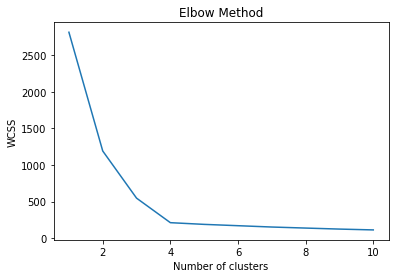

In [8]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

note:

- **n_init**: (default: 10) Another significant parameter n_init is used to define the number of initialization attempts for centroids of clusters.

- **‘k-means++’** : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

    - Initialization of centroids is an important concept for K-Means algorithm. If the initialization is not correct or as intended this value can be increased to make more attempts to initialize the model with optimum centroids. Default value 10 usually produces good results without compromising too much computational efficiency.
    
    

- **inertia_float**: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

- **random_stateint**, RandomState instance or None, default=None Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

Optimal number of clusters: 4

-> use this number to categorize data


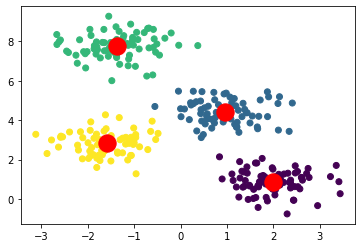

In [10]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y=kmeans.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.show()

note:

- fit_predict(X, y=None, sample_weight=None)[source]
    - Compute cluster centers and predict cluster index for each sample.
    - Convenience method; equivalent to calling fit(X) followed by predict(X).